In [2]:
#드라이브 마운트
#디렉토리 변경
import os
os.chdir('/content/drive/MyDrive/ML/Data')

In [22]:
#1.CSV데이터 가져오기(house_prices.csv)
import pandas as pd
csv_data = pd.read_csv('house_prices.csv')
csv_data.head()

,House Size (sq ft),House Price
0,1624,426221
1,3352,1111674
2,2696,818731
3,2296,638096
4,968,239868


In [5]:
#2.특성데이터와 정답데이터 구분
house_data = csv_data[['House Size (sq ft)']]
house_target = csv_data['House Price']

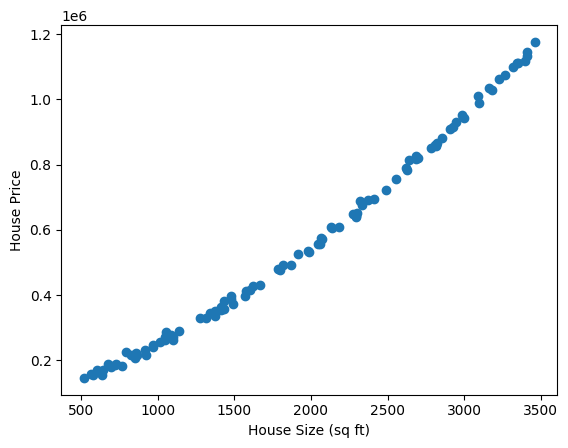

In [6]:
import matplotlib.pyplot as plt
plt.scatter(house_data, house_target)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price')
plt.show()

In [7]:
#3.훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(house_data, house_target, random_state=42)
print(train_data.shape, test_data.shape)

(75, 1) (25, 1)


In [8]:
#4.모델훈련(LinearRegression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data, train_target)
model.score(test_data, test_target)

0.9866321586317416

In [9]:
#예측 데이터 읽어오기(house_prices_test.csv)
pred_csv = pd.read_csv('house_prices_test.csv')
pred_data = pred_csv[['House Size (sq ft)']]
pred_target = pred_csv['House Price']
print(model.predict(pred_data))

[105862.13768534 310818.31593171 515774.49417809 720730.67242446
 925686.85067083]


In [10]:
print(pred_target)

0    158000.0
1    302000.0
2    482000.0
3    698000.0
4    950000.0
Name: House Price, dtype: float64


In [11]:
print(model.predict([[3500]]))

[1096483.66587615]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


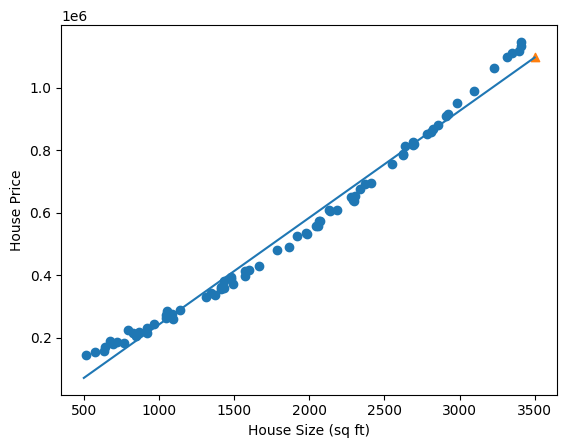

In [12]:
import matplotlib.pyplot as plt
import numpy as np
point = np.arange(500, 3500)

plt.scatter(train_data, train_target)
plt.scatter(3500, 1096484, marker='^')
plt.plot(point, model.coef_ * point + model.intercept_)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price')
plt.show()

###다항회귀

* 하나의 특성값을 이용하여 차수를 높이는 회귀분석

In [13]:
#다항회귀(perch_data)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
perch_poly = poly.fit_transform(house_data)
print(perch_poly.shape)
print(poly.get_feature_names_out())

(100, 2)
['House Size (sq ft)' 'House Size (sq ft)^2']


In [14]:
#3.훈련 데이터와 테스트 데이터로 분리
train_data, test_data, train_target, test_target = train_test_split(perch_poly, house_target, random_state=42)
print(train_data.shape, test_data.shape)

(75, 2) (25, 2)


In [15]:
#4.모델훈련(LinearRegression)
model2 = LinearRegression()
model2.fit(train_data, train_target)
model2.score(test_data, test_target)

0.9994995899204252

In [16]:
#5.결과 예측
pred_poly = poly.transform(pred_data)
print(model2.predict(pred_poly))

[161488.17946069 302092.28148498 480026.49532757 695290.82098846
 947885.25846764]


In [17]:
print(pred_target)

0    158000.0
1    302000.0
2    482000.0
3    698000.0
4    950000.0
Name: House Price, dtype: float64


In [18]:
print(model2.predict([[3500, 3500 ** 2]]))

[1186896.6806726]


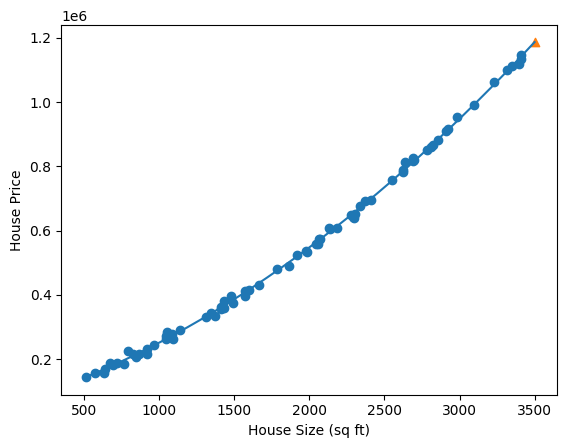

In [19]:
import matplotlib.pyplot as plt
import numpy as np
point = np.arange(500, 3500)

plt.scatter(train_data[:, 0], train_target)
plt.scatter(3500, 1186897, marker='^')
plt.plot(point, model2.coef_[1] * point ** 2 + model2.coef_[0] * point + model2.intercept_)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price')
plt.show()

###다중회귀

* 2개 이상의 특성값을 이용하는 회귀분석

In [21]:
#1.CSV데이터 가져오기(weight_predictio.csv)
import pandas as pd
csv_data2 = pd.read_csv('weight_prediction.csv')

In [23]:
#데이터 확인
csv_data2.head()

,Height (cm),Age,Caloric Intake (kcal),Weight (kg)
0,164.981605,49,3024,232.306310
1,188.028572,56,2947,247.985095
2,179.279758,66,1986,218.921605
3,173.946339,69,3149,238.525551
4,156.240746,49,2263,210.060976


In [26]:
#2.특성 데이터와 정답 데이터로 구분
weight_data = csv_data2[['Height (cm)',	'Age',	'Caloric Intake (kcal)']]
weight_target = csv_data2['Weight (kg)']

In [29]:
#3. 훈련데이터와 테스트 데이터로 분리
train_data2, test_data2, train_target2, test_target2 = train_test_split(weight_data, weight_target, random_state=42)
print(train_data.shape, test_data.shape)

(75, 3) (25, 3)


In [31]:
#4.모델학습 및 정확도
model3 = LinearRegression()
model3.fit(train_data2, train_target)
print(f'훈련데이터의 정확도:{model3.score(train_data2, train_target2)}')
print(f'테스트데이터의 정확도:{model3.score(test_data2, test_target2)}')

훈련데이터의 정확도:0.8947498390802312
테스트데이터의 정확도:0.8820156340440225


In [32]:
#다중회귀(train_data)
poly = PolynomialFeatures(include_bias=False)
train_poly = poly.fit_transform(train_data2)
print(train_poly.shape)
print(poly.get_feature_names_out())
test_poly = poly.transform(test_data2)

(75, 9)
['Height (cm)' 'Age' 'Caloric Intake (kcal)' 'Height (cm)^2'
 'Height (cm) Age' 'Height (cm) Caloric Intake (kcal)' 'Age^2'
 'Age Caloric Intake (kcal)' 'Caloric Intake (kcal)^2']


In [33]:
#모델 훈련 및 정확도(다중회귀)
model3.fit(train_poly, train_target)
print(f'훈련데이터의 정확도:{model3.score(train_poly, train_target2)}')
print(f'테스트데이터의 정확도:{model3.score(test_poly, test_target2)}')

훈련데이터의 정확도:0.9073779730526735
테스트데이터의 정확도:0.8588714198297114


In [34]:
#다중회귀(degree=5)
poly = PolynomialFeatures(degree=5, include_bias=False)
train_poly2 = poly.fit_transform(train_data2)
print(train_poly2.shape)
print(poly.get_feature_names_out())
test_poly2 = poly.transform(test_data2)

(75, 55)
['Height (cm)' 'Age' 'Caloric Intake (kcal)' 'Height (cm)^2'
 'Height (cm) Age' 'Height (cm) Caloric Intake (kcal)' 'Age^2'
 'Age Caloric Intake (kcal)' 'Caloric Intake (kcal)^2' 'Height (cm)^3'
 'Height (cm)^2 Age' 'Height (cm)^2 Caloric Intake (kcal)'
 'Height (cm) Age^2' 'Height (cm) Age Caloric Intake (kcal)'
 'Height (cm) Caloric Intake (kcal)^2' 'Age^3'
 'Age^2 Caloric Intake (kcal)' 'Age Caloric Intake (kcal)^2'
 'Caloric Intake (kcal)^3' 'Height (cm)^4' 'Height (cm)^3 Age'
 'Height (cm)^3 Caloric Intake (kcal)' 'Height (cm)^2 Age^2'
 'Height (cm)^2 Age Caloric Intake (kcal)'
 'Height (cm)^2 Caloric Intake (kcal)^2' 'Height (cm) Age^3'
 'Height (cm) Age^2 Caloric Intake (kcal)'
 'Height (cm) Age Caloric Intake (kcal)^2'
 'Height (cm) Caloric Intake (kcal)^3' 'Age^4'
 'Age^3 Caloric Intake (kcal)' 'Age^2 Caloric Intake (kcal)^2'
 'Age Caloric Intake (kcal)^3' 'Caloric Intake (kcal)^4' 'Height (cm)^5'
 'Height (cm)^4 Age' 'Height (cm)^4 Caloric Intake (kcal)'
 'Height (cm

In [35]:
#모델 훈련 및 정확도(다중회귀)
model3.fit(train_poly2, train_target)
print(f'훈련데이터의 정확도:{model3.score(train_poly2, train_target2)}')
print(f'테스트데이터의 정확도:{model3.score(test_poly2, test_target2)}')

훈련데이터의 정확도:0.01896902173168591
테스트데이터의 정확도:-3.8938734553127237


###과대적합(Overfitting) & 과소적합(Underfitting)

![](https://images.velog.io/images/arittung/post/d68462e5-77cb-47fc-acee-a8cb5ea1925d/image.png)

과대 적합(Overfitting)

* 모델이 훈련 세트에서는 좋은 성능을 내지만 검증 세트에서는 낮은 성능을 내는 경우.

* 훈련 세트와 검증 세트에서 측정한 성능의 간격이 큼. (== 분산이 큼(high variance))

* 과대 적합의 주요 원인
: 훈련 세트에 충분히 다양한 샘플이 포함되지 않음.

* 해결 방법 :

> 1) 훈련 세트에 충분히 다양한 샘플을 포함시킴.

> 2) 훈련 샘플을 더 모을 수 없는 경우, 모델이 훈련 세트에 집착하지 않도록 가중치를 제한함. (= 모델의 복잡도를 낮춤)

> 3) 훈련 데이터의 잡음을 줄임.(Outlier, Error 제거)

과소 적합(Underfitting)

* 훈련 세트와 검증 세트의 성능에는 차이가 크지 않지만 모두 낮은 성능을 내는 경우. 훈련 세트와 검증 세트의 성능이 서로 가까워지면 성능 자체가 낮음.

* 과소적합된 모델을 '편향이 크다(high bias)'라고도 함.

* 해결 방법 :

> 1) 복잡도가 더 높은 모델(파라미터가 더 많은 모델) 사용

> 2) 가중치 규제 완화

### 규제
* 릿지(Ridge) = (L2규제) = $(가중치)^2$
* 라쏘(Lasso) = (L1규제) = |가중치|

In [39]:
#표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_poly2)
test_scaled = ss.transform(test_poly2)

In [40]:
#릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(f'훈련데이터의 정확도 : {ridge.score(train_scaled, train_target)}')
print(f'테스트데이터의 정확도 : {ridge.score(test_scaled, test_target)}')

훈련데이터의 정확도 : 0.9062673461235485
테스트데이터의 정확도 : 0.8623682060730737


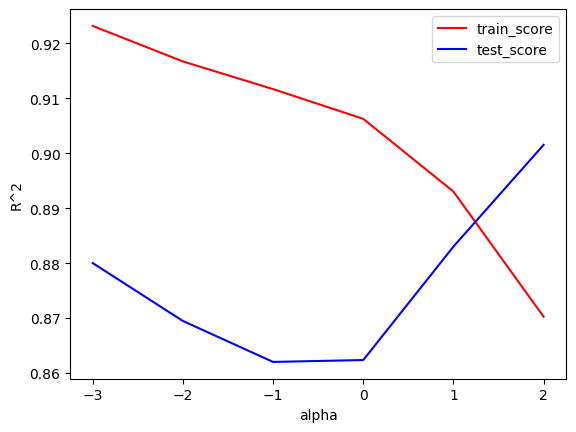

In [41]:
#최적의 하이퍼파라미터(alpha값)_Ridge
import numpy as np

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target2)
  train_score.append(ridge.score(train_scaled, train_target2))
  test_score.append(ridge.score(test_scaled, test_target2))

plt.plot(np.log10(alpha_list), train_score, color='r')
plt.plot(np.log10(alpha_list), test_score, color='b')
plt.legend(['train_score', 'test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [43]:
#Ridge 훈련 및 정확도(alpha=10)
#alpha(규제강도):하이퍼파라미터(사용자 지정 값), 알파값이 커지면 규제강도 커짐
ridge = Ridge(alpha=10)
ridge.fit(train_scaled, train_target)
print(f'훈련데이터의 정확도 : {ridge.score(train_scaled, train_target)}')
print(f'테스트데이터의 정확도 : {ridge.score(test_scaled, test_target)}')

훈련데이터의 정확도 : 0.8930312716370455
테스트데이터의 정확도 : 0.8830140330156326


In [44]:
print(np.sum(ridge.coef_ == 0))

0


In [45]:
#Lasso 훈련 및 정확도
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(f'훈련데이터의 정확도 : {lasso.score(train_scaled, train_target)}')
print(f'테스트데이터의 정확도 : {lasso.score(test_scaled, test_target)}')

훈련데이터의 정확도 : 0.8845258249634435
테스트데이터의 정확도 : 0.8889493204137039


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.734e+02, tolerance: 2.259e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.232e+01, tolerance: 2.259e+00
  model = cd_fast.enet_coordinate_descent(


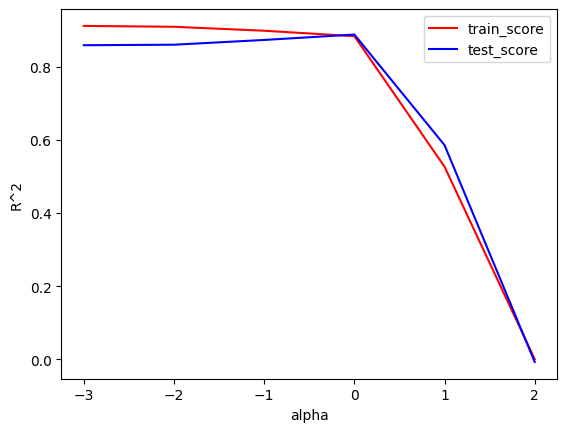

In [46]:
#최적의 하이퍼파라미터(alpha값)_Lasso
train_score2 = []
test_score2 = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_scaled, train_target2)
  train_score2.append(lasso.score(train_scaled, train_target2))
  test_score2.append(lasso.score(test_scaled, test_target2))

plt.plot(np.log10(alpha_list), train_score2, color='r')
plt.plot(np.log10(alpha_list), test_score2, color='b')
plt.legend(['train_score', 'test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [49]:
#Lasso 훈련 및 정확도(alpha=0.1)
lasso = Lasso(alpha=0.1)
lasso.fit(train_scaled, train_target)
print(f'훈련데이터의 정확도 : {lasso.score(train_scaled, train_target)}')
print(f'테스트데이터의 정확도 : {lasso.score(test_scaled, test_target)}')

훈련데이터의 정확도 : 0.8994047744535172
테스트데이터의 정확도 : 0.8741784691595164


In [50]:
print(np.sum(lasso.coef_ == 0))
print(lasso.coef_ == 0)

48
[False False False  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False  True]


In [51]:
print(np.sum(lasso.coef_ != 0))
print(lasso.coef_)

7
[ 1.45455591  0.27817527  1.90777361  0.          0.         15.25461591
  3.45789679  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.         -0.          0.          0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.13117928 -1.38986334
  0.        ]
